<a href="https://colab.research.google.com/github/anudeepdivi/anudeep/blob/main/Facemaskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

###Importing Dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:06<00:00, 30.6MB/s]
100% 163M/163M [00:06<00:00, 25.0MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


###Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3718.jpg', 'with_mask_3192.jpg', 'with_mask_2856.jpg', 'with_mask_86.jpg', 'with_mask_1704.jpg']
['with_mask_59.jpg', 'with_mask_1863.jpg', 'with_mask_2851.jpg', 'with_mask_173.jpg', 'with_mask_873.jpg']


In [ ]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1338.jpg', 'without_mask_3496.jpg', 'without_mask_486.jpg', 'without_mask_3624.jpg', 'without_mask_2240.jpg']
['without_mask_3166.jpg', 'without_mask_322.jpg', 'without_mask_1608.jpg', 'without_mask_2295.jpg', 'without_mask_1334.jpg']


In [ ]:
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))


Number of with mask images:  3725
Number of without mask images:  3828


###Creating Labels for the two classes of images

with mask   --> 1


without mask --> 0

In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


###Displaying the Images

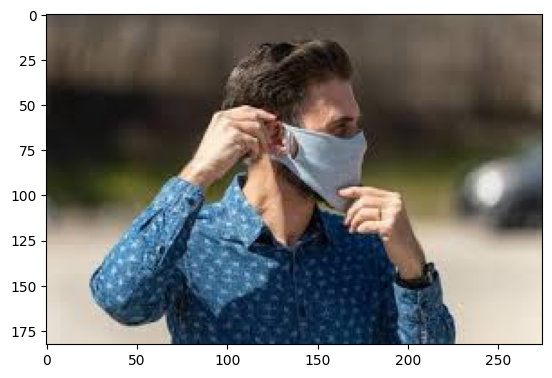

In [ ]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
implot = plt.imshow(img)
plt.show()

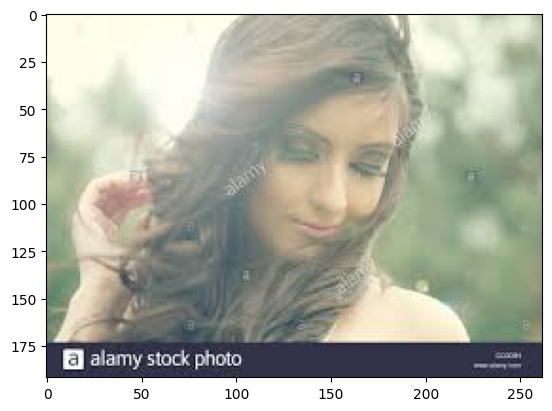

In [ ]:
#displaying with mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1456.jpg')
implot = plt.imshow(img)
plt.show()

###Image Processing

Resize the images

convert the images to numpy arrays

In [ ]:
#convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

data = []


for img_file in with_mask_files:
    image= Image.open(with_mask_path + img_file)
    image= image.resize((128,128))
    image= image.convert('RGB')
    image= np.array(image)
    data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image= Image.open(without_mask_path + img_file)
  image= image.resize((128,128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)


In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


##Train/Test split

In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling data
X_train_scale = X_train/255
X_test_scaled = X_test/255

### Building CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape= (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(256, kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [ ]:
#compile the CNN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scale,Y_train,validation_split=0.1,epochs=7)

Epoch 1/7
170/170 [==============================] - 197s 1s/step - loss: 0.5948 - acc: 0.6596 - val_loss: 0.2624 - val_acc: 0.8909
Epoch 2/7
170/170 [==============================] - 197s 1s/step - loss: 0.3135 - acc: 0.8884 - val_loss: 0.1873 - val_acc: 0.9388
Epoch 3/7
170/170 [==============================] - 199s 1s/step - loss: 0.2374 - acc: 0.9255 - val_loss: 0.2694 - val_acc: 0.9190
Epoch 4/7
170/170 [==============================] - 199s 1s/step - loss: 0.1961 - acc: 0.9384 - val_loss: 0.1307 - val_acc: 0.9636
Epoch 5/7
170/170 [==============================] - 198s 1s/step - loss: 0.1784 - acc: 0.9426 - val_loss: 0.2143 - val_acc: 0.9322
Epoch 6/7
170/170 [==============================] - 197s 1s/step - loss: 0.1594 - acc: 0.9467 - val_loss: 0.1388 - val_acc: 0.9537
Epoch 7/7
170/170 [==============================] - 193s 1s/step - loss: 0.1386 - acc: 0.9570 - val_loss: 0.1377 - val_acc: 0.9537


###Model Evaluation

In [ ]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 [==============================] - 16s 339ms/step - loss: 0.1553 - acc: 0.9477
Test Accuracy = 0.9477167725563049


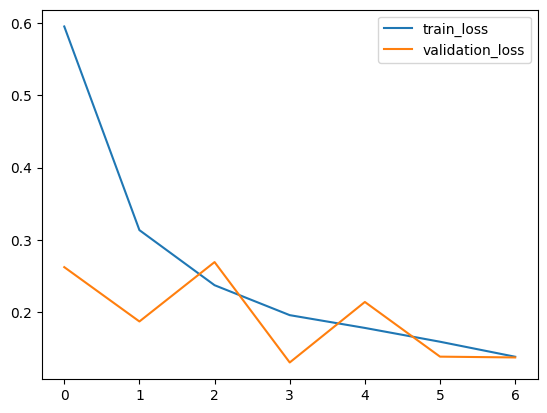

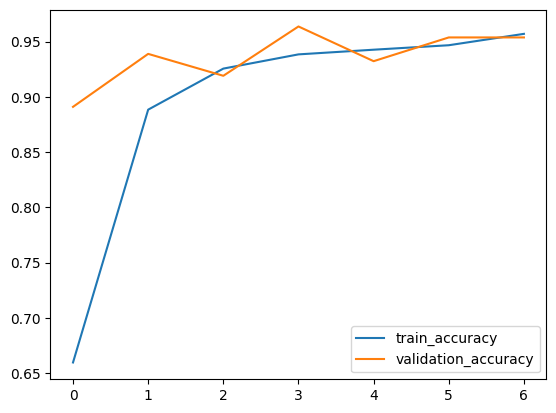

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

###Predictive Sysytem

Path of the image to be predicted:/content/istockphoto-1210281462-612x612.jpg


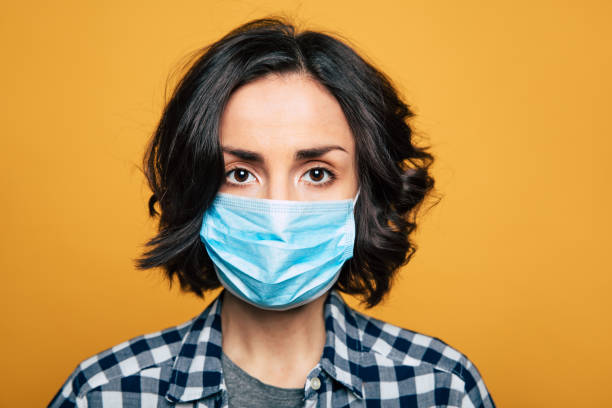

1/1 [==============================] - 0s 220ms/step
[[0.21085684 0.88293695]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image= cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')

